# Exposure model:  Complete highway network

This IPython notebook processes a shapefile, and creates an exposure model.

Each asset has a typology associated, that will be defined based on an external .csv file or on the length of the asset.

In [1]:
%matplotlib inline
import utilsNetwork

Specify the location of the vector GIS file containing the network

In [3]:
networkShp = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/EntireNetwork/mo_FINAL.shp'

(shpAdj,maxNumConn) = utilsNetwork.shp_adj(networkShp)

Specify the location of the folder where the results will be saved

In [4]:
resultsFolder = '/media/sf_Shared_Folder/Paper_Scenarios/2016-09-Revision/' 

Specify maxDist, the maximum distance between 2 points in the network (in km). If an edge is bigger than maxDist, it will be divided in two, creating a new point.
Note: only verifies if 1st or 2nd relation node distances are > maxDist

In [5]:
maxDist = 20
maxDistBr = 20

In [6]:
shpAdjMaxDist = utilsNetwork.divide_edges(shpAdj,maxNumConn,maxDist)

Choose between option A or B:

A: Provide a vector GIS file containing the location of the bridges (bridges_shp)

OR

B: Provide a .csv file containing the assets coordinates (one node per asset) (brNodes).
In this option, if you have the exact coordinates of the assets in the network, use find_br_rows_exact_coord (faster).
Else, if you want to search the closest node to the given coordinates, use find_br_rows_closest_coord

In [9]:
#Option A
bridgesShp = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/EntireNetwork/mo_br.shp'
brAdj = utilsNetwork.shp_adj_br(bridgesShp,maxDistBr,resultsFolder)
brRows = utilsNetwork.one_node_per_bridge(brAdj,shpAdjMaxDist,resultsFolder)

##### OR #####

#Option B
#brNodes = '/media/sf_Shared_Folder/testFilesExposure/br-simple.csv'
#brRows = utilsNetwork.find_br_rows_closest_coord(shpAdjMaxDist, brNodes)
#brRows = utilsNetwork.find_br_rows_exact_coord(shpAdjMaxDist,brNodes)

Option A: If assets (viaducts) that cross the network are to be considered, provide a .csv file with the coordinates of these assets (brPerpNodes)

Option B: If these assets are not considered

In [10]:
#Option A
brPerpNodes = '/home/openquake/GEM/Lifelines/Building_NetworkNew/Input_files/EntireNetwork/br_nodes+links_nodes_mo.csv'

brPerpRows = utilsNetwork.find_br_rows_exact_coord(shpAdjMaxDist,brPerpNodes)
brPerpRows = utilsNetwork.find_br_rows_closest_coord(shpAdjMaxDist,brPerpNodes)

#Option B
#brPerpRows = 0

In this case we assume four typologies of assets: three typologies of bridges and one of viaducts 

FF1: Single span bridges (length < 40m)

FF2: Multi-span medium length (40m < length < 150m)

FF3: Multi-span major bridges (length > 150m)

FF4: Viaducts

In [11]:
limit_length1 = 40.
limit_length2 = 150.
adj = utilsNetwork.sim_adj(shpAdjMaxDist,brRows,brPerpRows,maxDist,limit_length1,limit_length2)

In [12]:
(nodes, edges, weights) = utilsNetwork.save_files_networkx(adj,maxNumConn,resultsFolder)

Choose between a directed or undirected graph (if the direction of the edges is taken into account or not)

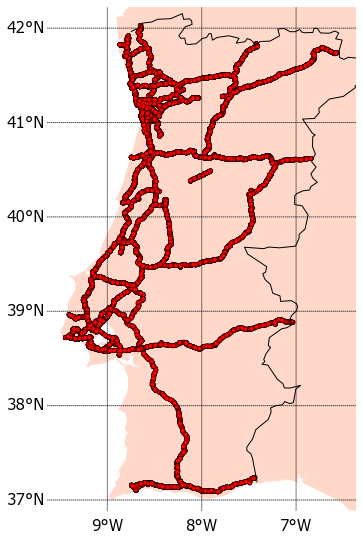

In [13]:
import networkx as nx
#Directed graph:
G = nx.DiGraph()
#Undirected graph:
#G = nx.Graph()   

(plotN,G,pos,pngLimits) = utilsNetwork.draw_network(nodes, edges, weights,G)

Option A: if the exposure model will only include point assets (the assets previously specified) 

OR 

Option B: if the exposure model will include point and linear assets

In [14]:
#nodes = '/media/sf_Shared_Folder/testFilesExposure/network-nodes.txt'

#Option A: Select only the nodes that are bridges
utilsNetwork.exposure_only_br(nodes,adj,resultsFolder)

##### OR #####

#Option B: Select all the nodes (bridges and pavement)
#utilsNetwork.exposure_br_pav(nodes,adj,resultsFolder)

If the fragility functions depend on the zone where the asset is located, provide files with the corresponding zones below:

In [13]:
from time import gmtime, strftime
print "Task started at "+strftime("%Y-%m-%d %H:%M:%S", gmtime())

zoneA = './Input_files/ShpZones/ZonaA-buffer.shp'
zoneB = './Input_files/ShpZones/ZonaB-buffer.shp'
zoneC = './Input_files/ShpZones/ZonaC-buffer.shp'
zoneD = './Input_files/ShpZones/ZonaD-buffer.shp'

pathNodes = '/media/sf_Shared_Folder/testFilesExposure/network-ff.txt'

utilsNetwork.RSA_zones(zoneA,zoneB,zoneC,zoneD,pathNodes,resultsFolder)

print "Task ended at "+strftime("%Y-%m-%d %H:%M:%S", gmtime())

Task started at 2016-04-29 09:56:03
Task ended at 2016-04-29 09:56:05
